### Gradient Boosting Exercise

- Following example on this [blog post](https://www.kaggle.com/grroverpr/gradient-boosting-simplified/)

In [3]:
# create class for simple decision tree

class DecisionTree():
    # initializer
    def __init__(self, X, y, idx=None, min_leaf=2):
        if idx is None:
            idx = np.arange(len(y))
        self.X, self.y = X, y
        self.n, self.c = len(idx), X.shape[1]
        self.idx, self.min_leaf = idx, min_leaf
        self.val = np.mean(y[idx])
        self.score = float('inf')
        self.split_tree()
    
    # get column names specified by var_idx
    @property
    def split_name(self):
        return self.X.columns[self.var_idx]
    
    # return the column that best splits the data
    @property
    def split_col(self):
        return self.X.values[self.idx, self.var_idx]
    
    # check if the leaf node is reached
    @property
    def is_leaf(self):
        return self.score == float('inf')
    
    def __repr__(self):
        string = f'n: {self.n}; val: {self.val}'
        if not self.is_leaf:
            string += f'; score: {self.score}; split: {self.split}; var: {self.split_name}'
        return string
    
    def std_agg(self, cnt, s1, s2):
        return np.sqrt((s2/cnt) - (s1/cnt)**2)
    
    def split_tree(self):
        # loop through every column in the input matrix and call find_better_split to find the best split value
        for col in range(self.c):
            self.find_better_split(col)
            
        # end the function if score doesn't change (at the end leaf)
        if self.score == float('inf'): return
        # get the column that best splits the data
        column = self.split_col
        # compare the column values with the best split value. left side if smaller, right side if larger
        left = np.nonzero(column<=self.split)[0]
        right = np.nonzero(column>self.split)[0]
        # create new trees recursively using the left and right
        self.left = DecisionTree(self.X, self.y, self.idx[left])
        self.right = DecisionTree(self.X, self.y, self.idx[right])
    
    # funtion that finds the best value to minimize variance in each column
    def find_better_split(self, var_idx):
        x, y = self.X.values[self.idx, var_idx], self.y[self.idx]
        # iterate through each value in the column, split the column values with the current value. calucate variance
        for i in range(0, self.n-self.min_leaf-1):
            v = x[i]
            lhs = y[x<=v]
            rhs = y[x>v]
            lhs_cnt = len(lhs)
            rhs_cnt = len(rhs)
            if  i < self.min_leaf:
                continue
            current_score = np.var(lhs)*lhs_cnt + np.var(rhs)*rhs_cnt
            if  current_score < self.score:
                self.var_idx, self.score, self.split = var_idx, current_score, v
                
    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf:
            return self.val
        t = self.left if xi[self.var_idx]<=self.split else self.right
        return t.predict_row(xi)
            

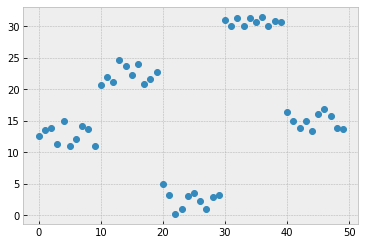

In [4]:
# data simulation

x = np.arange(0, 50)
x = pd.DataFrame({'x':x})

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)
y = np.concatenate((y1,y2,y3,y4,y5))
y=y[:, None]

plt.plot(x, y, 'o')

/Users/RayneYunZhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/RayneYunZhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/RayneYunZhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To cont

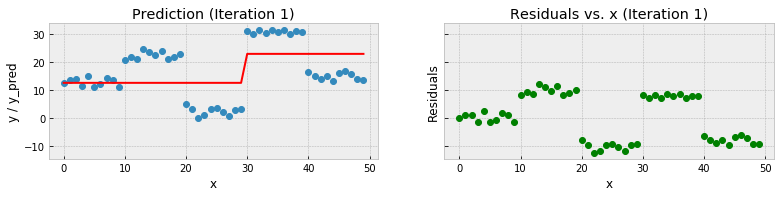

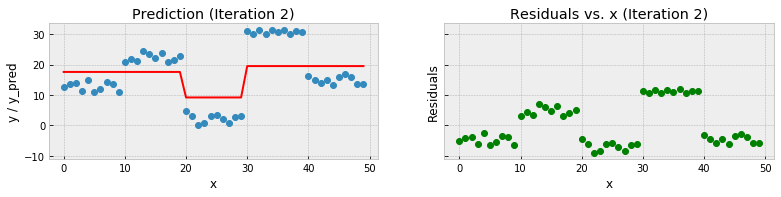

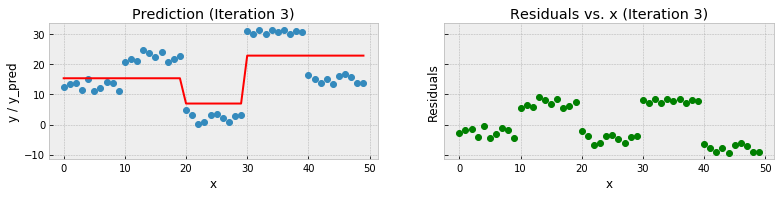

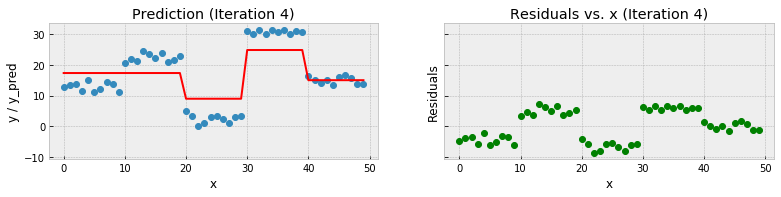

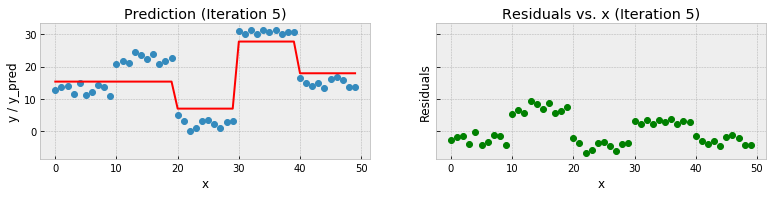

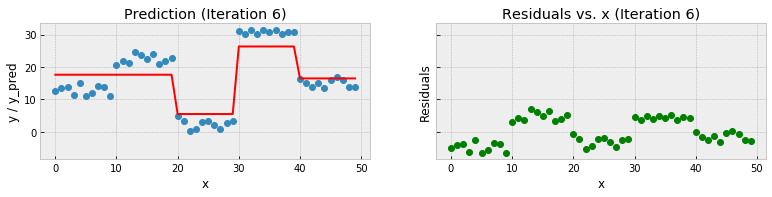

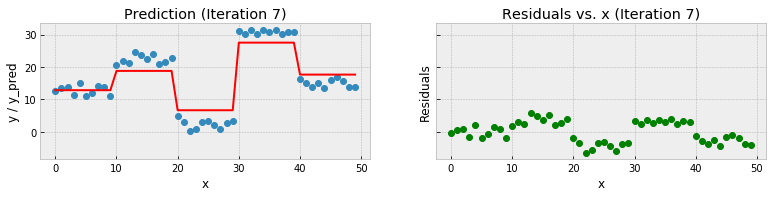

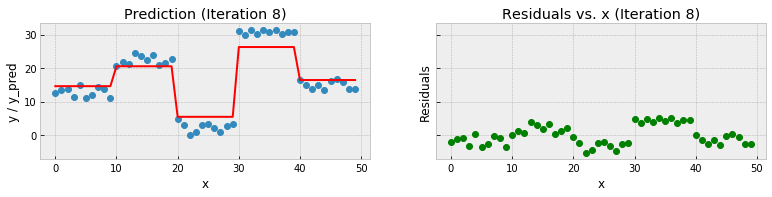

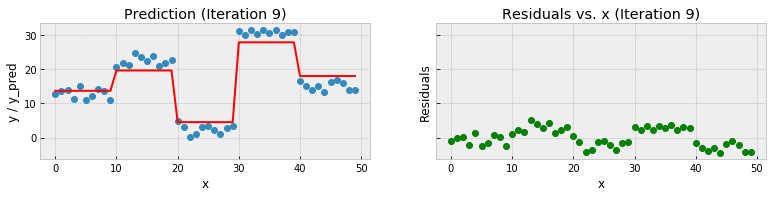

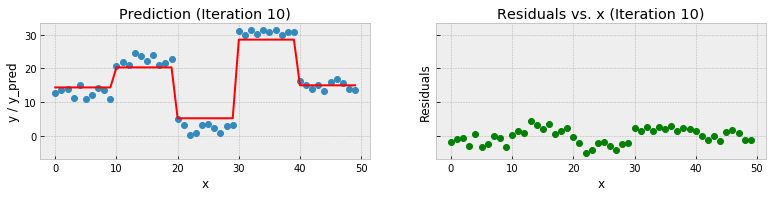

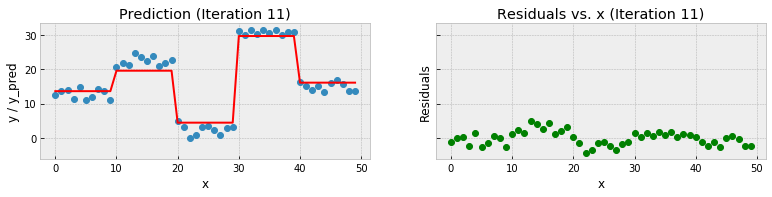

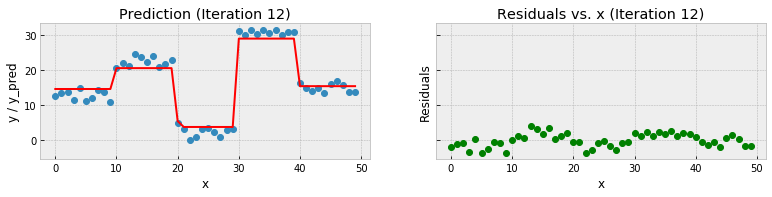

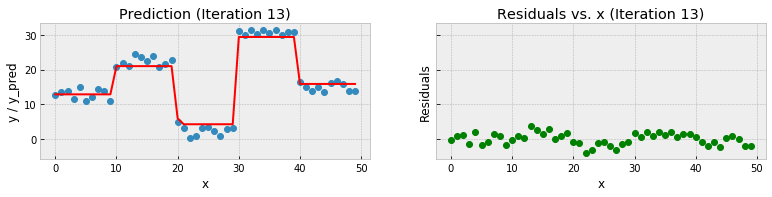

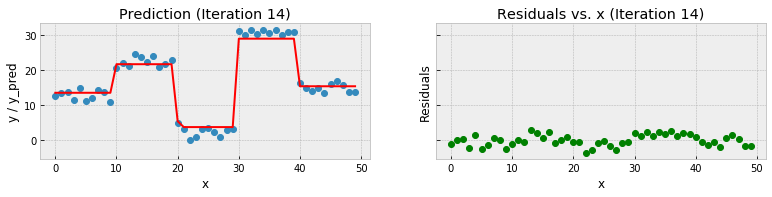

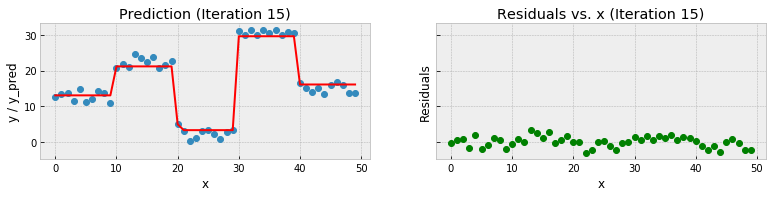

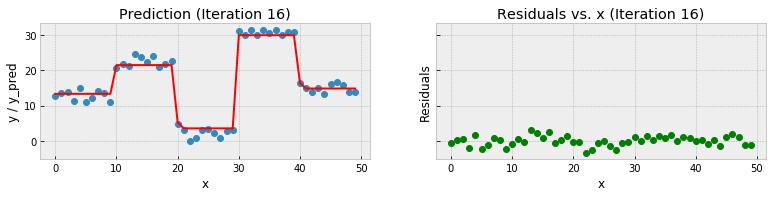

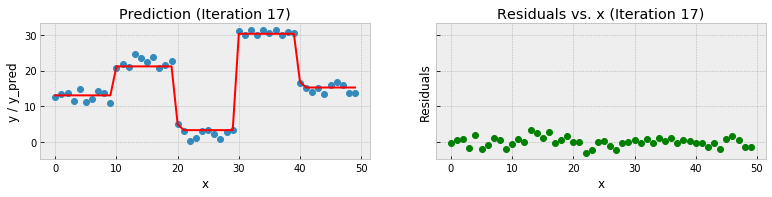

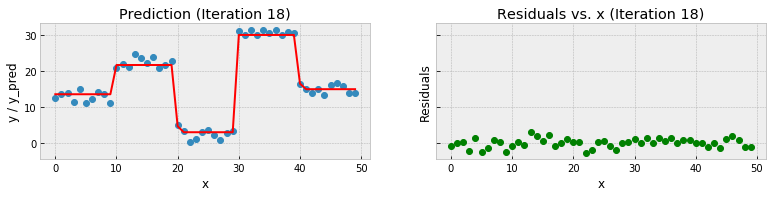

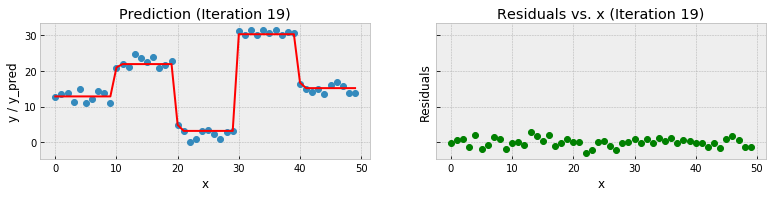

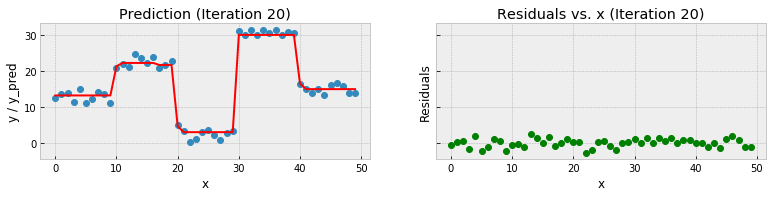

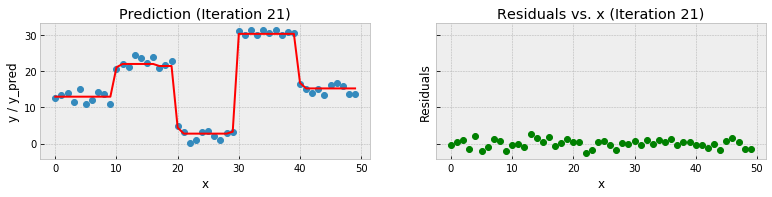

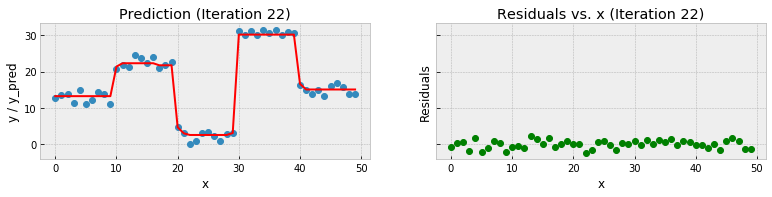

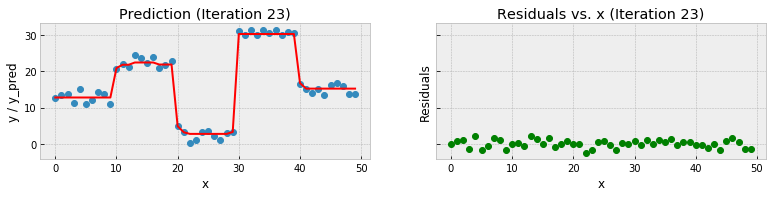

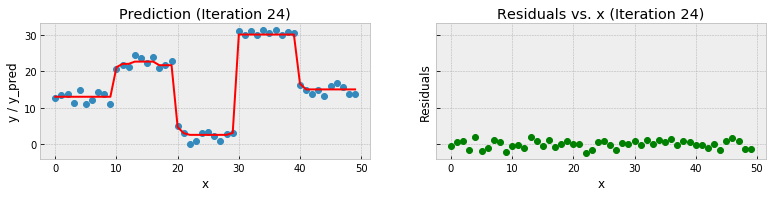

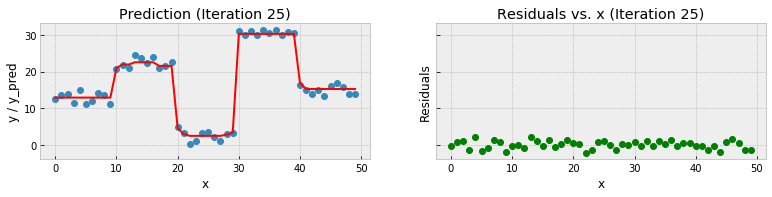

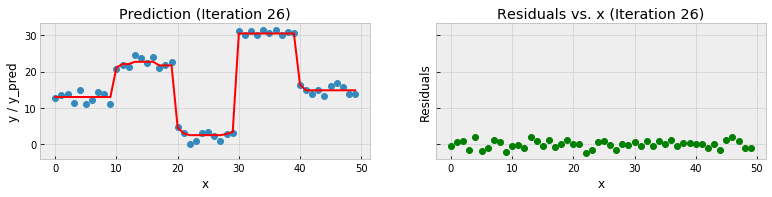

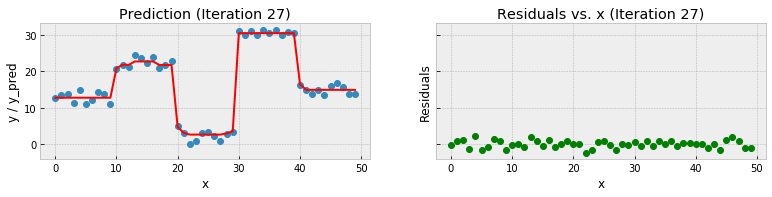

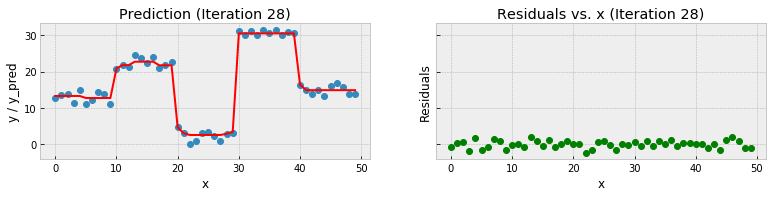

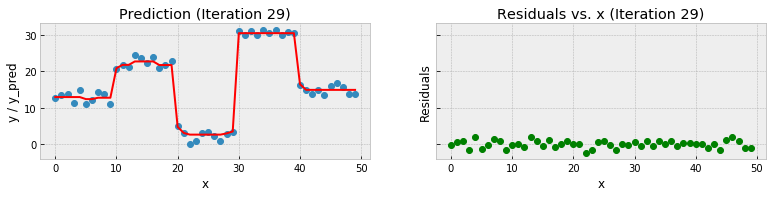

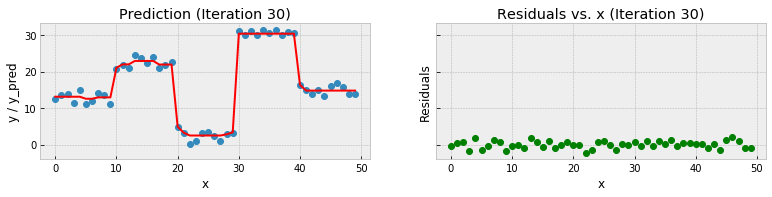

In [5]:
# Gradient Boosting

# initialize input, target, error
xi = x
yi = y
ei = 0
n = len(yi)
#initialize prediction
predf = 0

for i in range(30):
    tree = DecisionTree(xi, yi)
    tree.find_better_split(0)
    
    r = np.where(xi == tree.split)[0][0]
    
    left_idx = np.where(xi <= tree.split)[0]
    right_idx = np.where(xi > tree.split)[0]
    # initiallize prediction with zeros
    predi = np.zeros(n)
    
    np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))
    np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), r))
    
    predi = predi[:, None]
    predf = predf + predi
    
    ei = y - predf
    yi = ei
    
    xa = x.x.values
    order = np.argsort(xa)
    xs = xa[order]
    ys = np.array(predf)[order]
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(13, 2.5))

    ax1.plot(x,y, 'o')
    ax1.plot(xs, ys, 'r')
    ax1.set_title(f'Prediction (Iteration {i+1})')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y / y_pred')

    ax2.plot(x, ei, 'go')
    ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Residuals')